In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn
%matplotlib inline 

## Dataset: forge dataset

 An example of a synthetic two-class classification dataset. which has two features.

## Logistic Regression and Linear SVM

In [7]:
NOTE: Both Logistic Regression and Linear SVM employ L2 Reguralization by default (Ridge)

SyntaxError: invalid syntax (<ipython-input-7-951e5342e121>, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


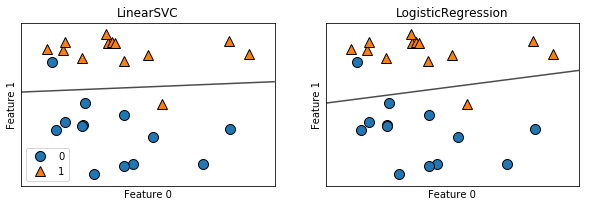

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression()], axes): 
    clf = model.fit(X, y)  
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)  
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)   
    ax.set_title("{}".format(clf.__class__.__name__))  
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1") 
    axes[0].legend()

## Cost Parameter Effects on Linear Boundary

Below are plots that show that higher values of c (less reguralization, more complex models, more overfitting) leads to decision boundary trying to correctly separate indiviudal data points. Lower c values (more reguralization, less overfitting, more generalizable) leads to decision boundary trying to fit the majority of the points

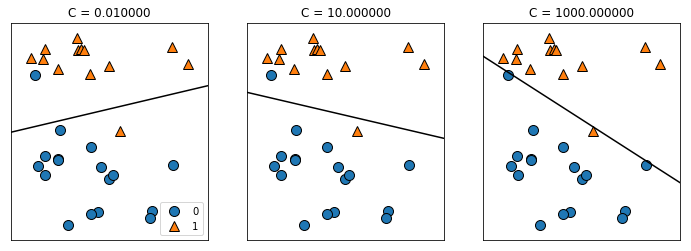

In [9]:
mglearn.plots.plot_linear_svc_regularization()

## Breast Cancer Data Set and logistic Regression

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer() 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 

logreg = LogisticRegression().fit(X_train, y_train) 

print("Training set score: ", logreg.score(X_train, y_train)) 
print("Test set score: ", logreg.score(X_test, y_test))

Training set score:  0.9553990610328639
Test set score:  0.958041958041958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Although this accuracy is good, the fact that training and testing set are nearly identical could be some indication of underfitting. Let's increase c (decrease reguralization) for a more flexible model. 

In [14]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: ", logreg100.score(X_train, y_train)) 
print("Test set score: ", logreg100.score(X_test, y_test))

Training set score:  0.971830985915493
Test set score:  0.965034965034965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The fact that they are not longer that identical could be an indication that the model was previously underfitting and a more complex model ( with C = 100) was a good choice. Out of curiousity let's see what happens when we decrease c ( more reguralization in general). 

In [15]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) 
print("Training set score: ", logreg001.score(X_train, y_train)) 
print("Test set score: ", logreg001.score(X_test, y_test))

Training set score:  0.9342723004694836
Test set score:  0.9300699300699301


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Since the model underfits with default parameters, increasing reguralization, both training and testing set accuracy decrease relative to the default parameters

### Visualizing the coefficient magnitudes for different reguralization 

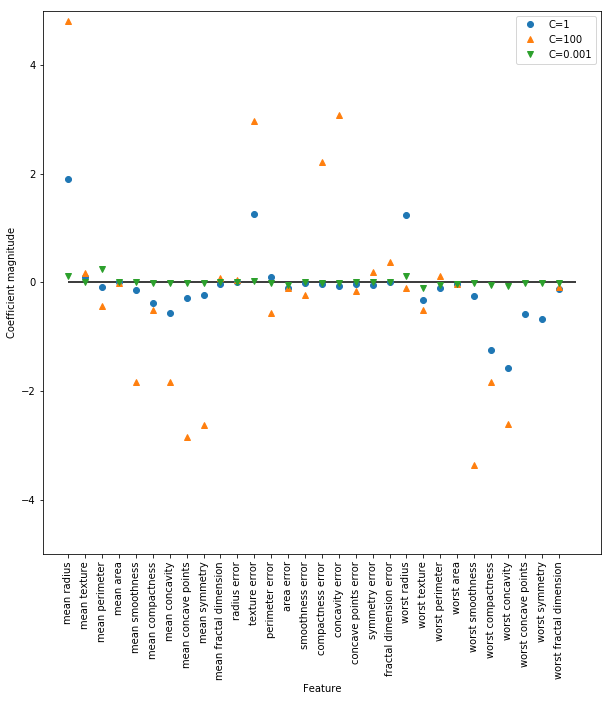

In [19]:
plt.figure(figsize = (10,10))
plt.plot(logreg.coef_.T, 'o', label="C=1") 
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Feature") 
plt.ylabel("Coefficient magnitude") 
plt.legend();

## Linear Models and MultiClassification

###  Class Data set using make_blobs ( 2 features, 3 classes) 

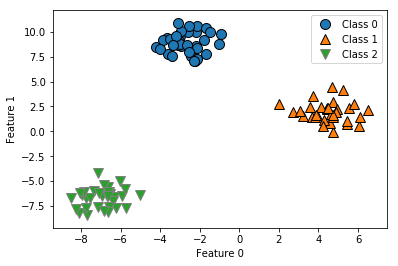

In [27]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);


In [25]:
### Linear SVM Classifier 

linear_svm = LinearSVC().fit(X, y) 
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


Note that Linear SVM makes an equation for each class using one vs all method when doing multi-classification. For coefficients (3,2) you have 3 classes with a coefficient for each feature per class. Then you have 3 intercepts (3,) for each class's equation. 

###  Visualize Multi-Class Decision Boundaries

Each class has a one vs all decision boundary

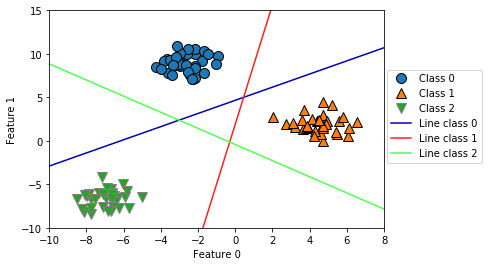

In [29]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15) 

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  mglearn.cm3.colors): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8) 
    plt.xlabel("Feature 0") 
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',  
                                        'Line class 2'], loc=(1.01, 0.3)) 

Below shows the prediciton for the the classes, in the middle triangle, your prediction is based on which decision boundary you are closer to 

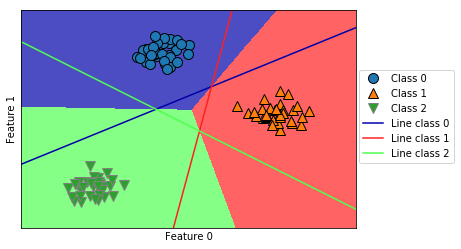

In [30]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):   
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 
                'Line class 2'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0") 
    plt.ylabel("Feature 1")
    